In [1]:
#Logistic Regression - 12.26.19
import pandas as pd
import numpy as np
import os

os.getcwd()

'/Users/jonzimmerman/Desktop/Udemy Courses/Data Science Course - 2019/Extra Python courses/Section 19'

In [4]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/
data=pd.read_csv("breast-cancer.data",sep=',',names=['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiate'])

In [5]:
data.head()
#Class=response variable

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
data.isna().sum()



Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiate      0
dtype: int64

In [9]:
data.count()


Class          699
age            699
menopause      699
tumor-size     699
inv-nodes      699
node-caps      699
deg-malig      699
breast         699
breast-quad    699
irradiate      699
dtype: int64

In [10]:
data.describe()
#only one numeric column

,Class,age,menopause,tumor-size,inv-nodes,deg-malig,breast,breast-quad,irradiate
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [11]:
import matplotlib as plt
import seaborn as sns

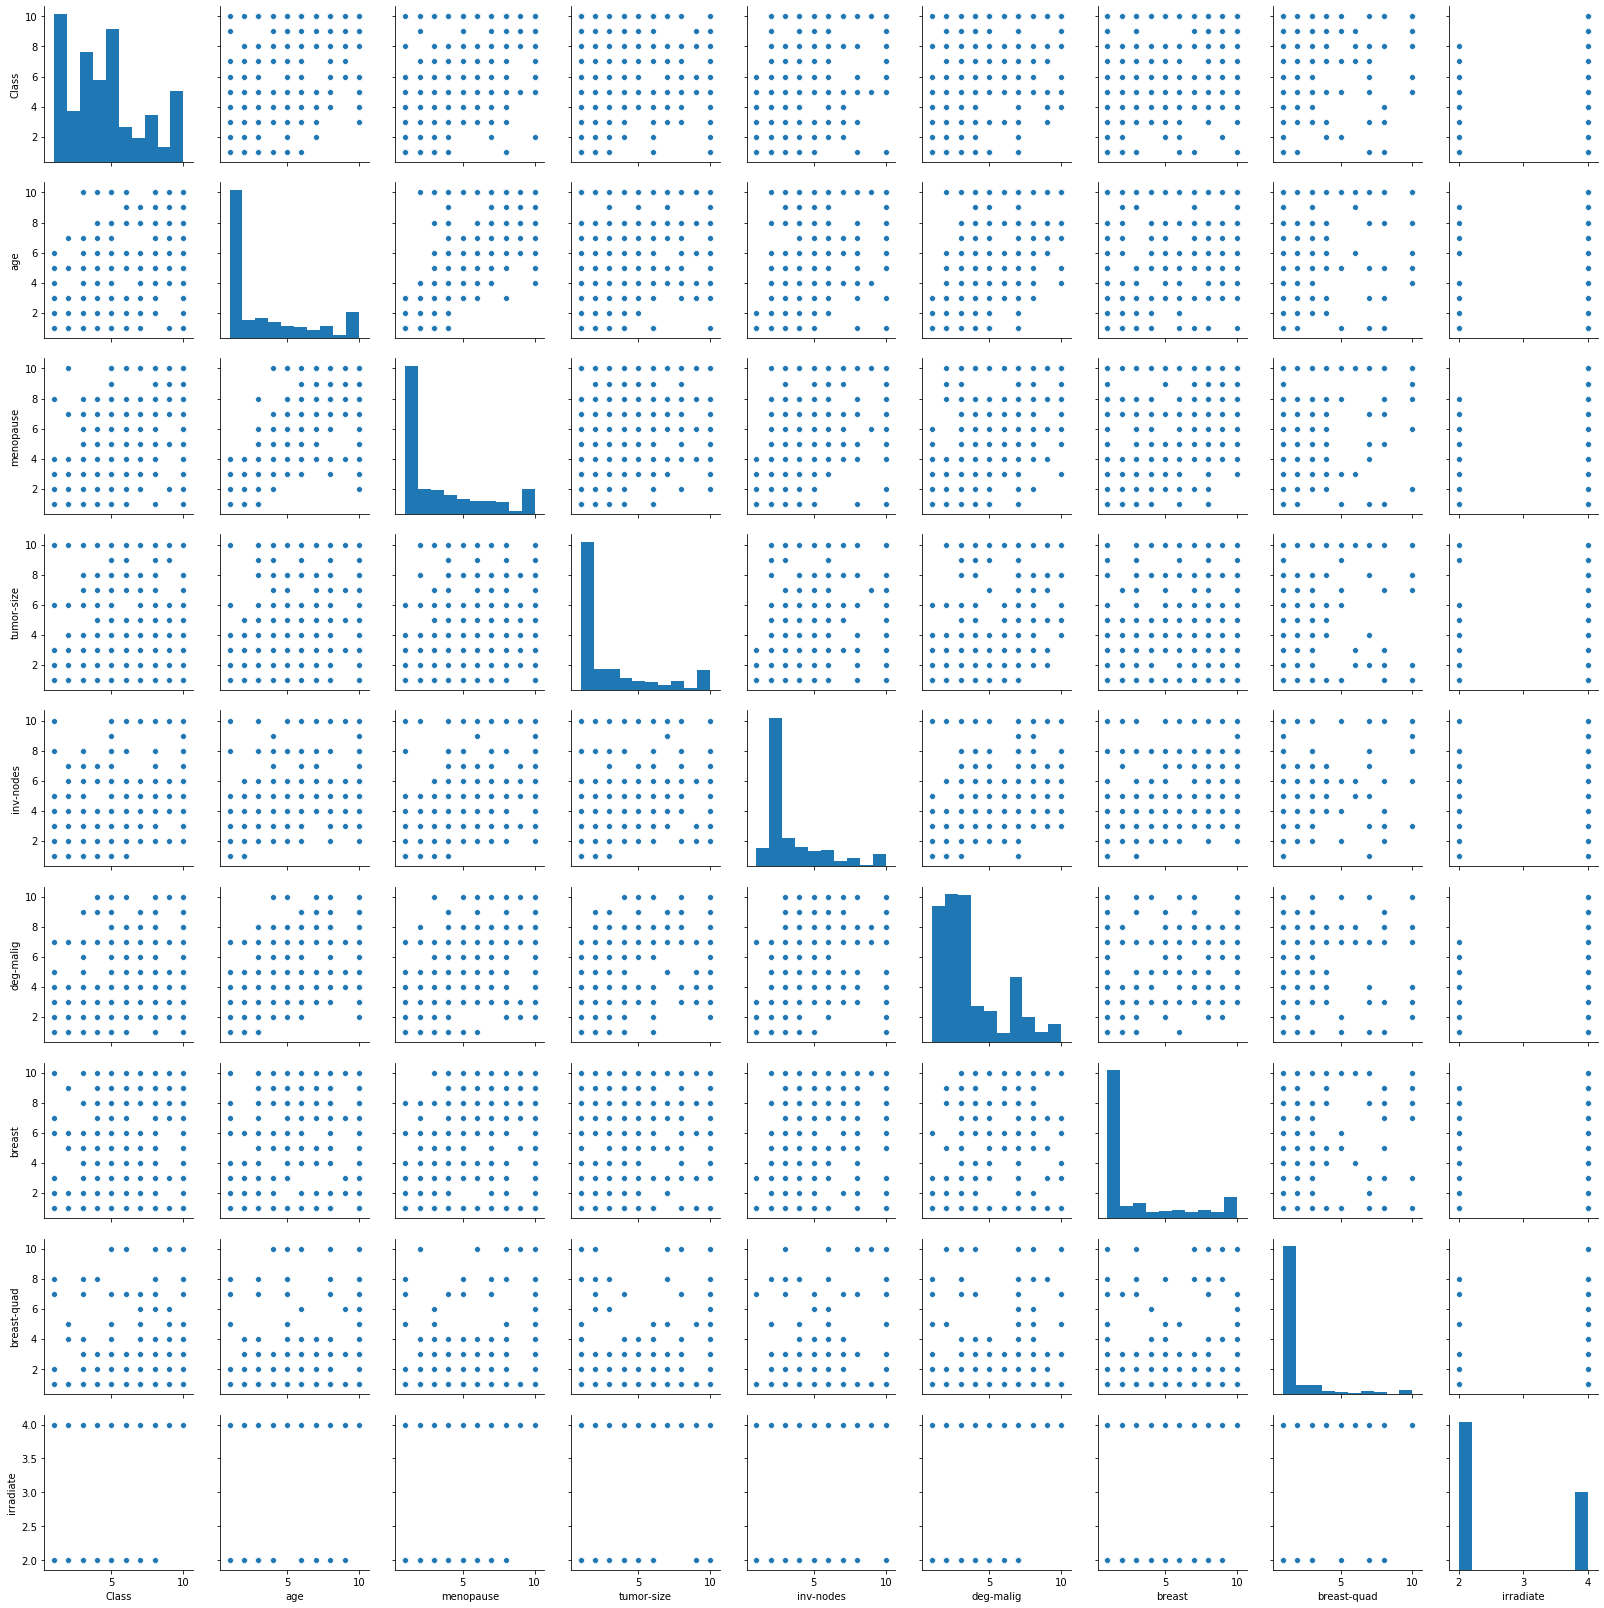

In [13]:
sns.pairplot(data)


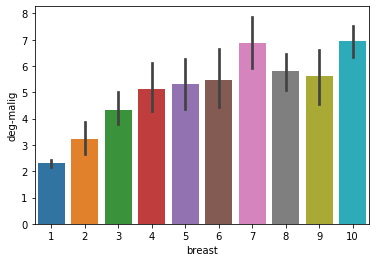

In [14]:
sns.barplot(x="breast",y="deg-malig",data=data)


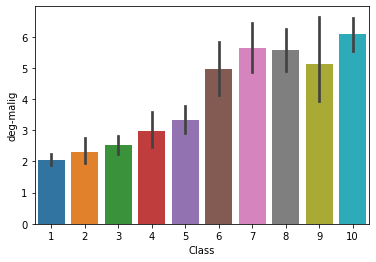

In [15]:
sns.barplot(x="Class",y="deg-malig",data=data)

In [17]:
from sklearn.model_selection import train_test_split
feature=data.drop("Class",axis=1).values
target=data["Class"].values

#class column has values of: no-recurr, recurr events
#this is our response
#rest of columns will be features

In [18]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,test_size=0.33,random_state=42,stratify=target)


In [19]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()


In [20]:
logmodel.fit(X_train, y_train)
#Can not use logistic regression or most ml models with text/categorical data
#need to convert them to numeric values

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: '?'

In [21]:
data.get_dtype_counts()
#object simply means "text"


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


int64     9
object    1
dtype: int64

In [22]:
data.head()
#scikit library can not handle 'no-recurrence-events' - need to convert this to 0 or 1
#same thing with '40-49' and all others


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [23]:
#label encoding from scikit
#from sklearn import preprocessing
##le=preprocessing.LabelEncoder()
#assigns values in ascending order - one column for one variable (0-4)
#will create labels - model can get confused and interpret a value of 4 numerically


In [24]:
#one hot encoding from scikit 
#from skLearn.preprocessing import OneHotEncoder
#enc-OneHotEncoder(handle_unknown='ignore')
#this will create 5 columns each with binary format (0/1)

hot_encoded=pd.get_dummies(data)
#now we have 43 columns, started with 10
#quickly increases dimensions and could make run time increase

hot_encoded.head(25)

,Class,age,menopause,tumor-size,inv-nodes,deg-malig,breast,breast-quad,irradiate,node-caps_1,node-caps_10,node-caps_2,node-caps_3,node-caps_4,node-caps_5,node-caps_6,node-caps_7,node-caps_8,node-caps_9,node-caps_?
1000025,5,1,1,1,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0
1002945,5,4,4,5,7,3,2,1,2,0,1,0,0,0,0,0,0,0,0,0
1015425,3,1,1,1,2,3,1,1,2,0,0,1,0,0,0,0,0,0,0,0
1016277,6,8,8,1,3,3,7,1,2,0,0,0,0,1,0,0,0,0,0,0
1017023,4,1,1,3,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0
1017122,8,10,10,8,7,9,7,1,4,0,1,0,0,0,0,0,0,0,0,0
1018099,1,1,1,1,2,3,1,1,2,0,1,0,0,0,0,0,0,0,0,0
1018561,2,1,2,1,2,3,1,1,2,1,0,0,0,0,0,0,0,0,0,0
1033078,2,1,1,1,2,1,1,5,2,1,0,0,0,0,0,0,0,0,0,0
1033078,4,2,1,1,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0


In [25]:
#Multicollinearity
#Response variable broken out into opposite binary variables
#when we hot_encoded it, its presenting same info from 2 diff columns
#dont need both as theyre redundant


In [33]:
#Here's the fix:
hot_encoded=pd.get_dummies(data,drop_first=True)
#drops first column of particular category
hot_encoded.head()
#now we only have 34 columns
#this is fine to do for the response variable, but we do lose valuable
# info from independent variables - its fine for this example (just dont repeat this in field)

,Class,age,menopause,tumor-size,inv-nodes,deg-malig,breast,breast-quad,irradiate,node-caps_10,node-caps_2,node-caps_3,node-caps_4,node-caps_5,node-caps_6,node-caps_7,node-caps_8,node-caps_9,node-caps_?
1000025,5,1,1,1,2,3,1,1,2,0,0,0,0,0,0,0,0,0,0
1002945,5,4,4,5,7,3,2,1,2,1,0,0,0,0,0,0,0,0,0
1015425,3,1,1,1,2,3,1,1,2,0,1,0,0,0,0,0,0,0,0
1016277,6,8,8,1,3,3,7,1,2,0,0,0,1,0,0,0,0,0,0
1017023,4,1,1,3,2,3,1,1,2,0,0,0,0,0,0,0,0,0,0


In [27]:
#Label-encoding & one-hot encoding is also used for similar purposes
#pandas get_dummies is similar to one hot encoding


In [38]:
feature1=hot_encoded.drop("Class_recurrence-events",axis=1).values
target1=hot_encoded['Class_recurrence-events'].values

KeyError: "['Class_recurrence-events'] not found in axis"

In [31]:
X_train, X_test, y_train, y_test = train_test_split(feature1,target1,test_size=0.33,random_state=42,stratify=target1)

logmodel.fit(X_train,y_train)

NameError: name 'feature1' is not defined

In [35]:
logmodel.score(X_test,y_test)

prediction=logmodel.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

#Precision = TP/(TP+FP) - denom is all values in dataset - % of corr classification
#Recall = TP/(TP+FN) 
#Support - number of smaples for true response in that calss
#F1 Score = 2*(Recall*Precision)/(Recall+Precision)


#How to optimize performance with grid search & regularization

#overfitting - model works well on training dataset but fails to work well with new/test data

#regularization is required to reduce overfitting
#overfitting happens when there is too much noise in the dataset
#too much noise can come from having too many variables
#there are two types of regularization techniques :
#     L1 (lasso)
#     L2 (Ridge Regression)

#Ridge regression helps by avoiding coefficients being too high - adds shrinkage parameter to model
#essentially we want our model to be less flexible where a less flexible model
#will not try to fit all the values

#we add shrinkage value in ridge
#lasso is almost similar to ridge - just that it penalizes the high coefficients making it less flexible

logmodel1=LogisticRegression(penalty='l1')

from sklearn.model_selection import GridSearchCV

#Using GridSearch CV to search for the best parameter
#number of values in a grid object for hyperparameter are arbitrary
#more values will take longer

#C - Inverse of regularization strength
#it helps in optimization of the regularization

grid=GridSearchCV(logmodel1,{'C':[0.0001,0.001,0.01,0.1,10]})
grid.fit(X_train,y_train)

#Print the best parameter
print("Best parameter is:",grid.best_params_)

#update the model
logmodel2=LogisticRegression(C=0.0001,penalty='l1')
#fitting the model
logmodel2.fit(X_train,y_train)

#Print the score - model fit metric
logmodel2.score(X_test,y_test)

prediction1=logmodel2.predict(X_test)
print(classification_report(y_test,prediction1))

NotFittedError: This LogisticRegression instance is not fitted yet